# Рынок заведений общественного питания Москвы

 Перезентация:

https://docs.google.com/presentation/d/1hyQ7osVdDt6tOW2p2BeKCsfy5cy3Dg-WgW3qO7CSTas/edit?usp=sharing

## Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

 - Задача: подготовить исследование рынка.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import median

## 1. Изучение данных

In [57]:
rest = pd.read_csv("/datasets/rest_data.csv")
mosgaz_streets = pd.read_csv('https://raw.githubusercontent.com/Archibaider/mos_gaz/master/mosgaz_streets.csv')

Таблица rest:
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

In [58]:
rest.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [59]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Таблица mosgaz_streets:
 - streetname — название улицы
 - areaid — код района
 - okrug — округ Москвы
 - area  — район Москвы

In [60]:
mosgaz_streets.head(5)

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [61]:
mosgaz_streets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


## Предобработка данных

In [62]:
# проверка на дубликаты
rest['id'].duplicated().sum()

0

## 2. Анализ данных

 - Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [63]:
#группируем по типу объекта
type_rest = rest.drop(['chain', 'id', 'address', 'number'], axis=1).groupby('object_type', as_index=False).count()

#переименовываем столбцы
type_rest.columns = ['object_type','type_count']

#сортируем по количеству
type_rest = type_rest.sort_values(by = 'type_count', ascending = False)

In [64]:
#стиль графиков
sns.set( context = 'notebook' , style = 'whitegrid' , palette = 'deep' , font = 'sans-serif' , font_scale = 1 , color_codes = True , rc = None )

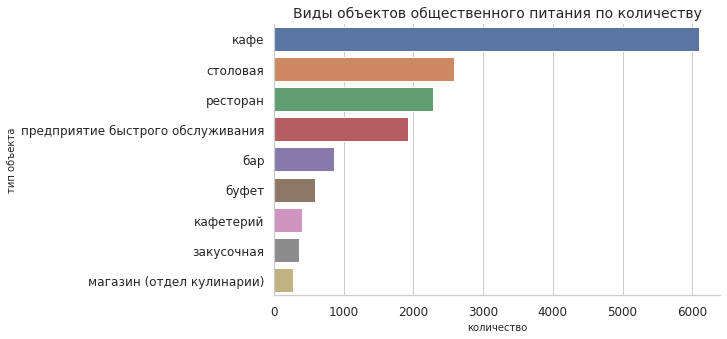

In [65]:
f, ax = plt.subplots(figsize=(8, 5))

sns.barplot( x ="type_count", y="object_type", data=type_rest)

ax.set_title('Виды объектов общественного питания по количеству', fontsize=14)
ax.set_xlabel('количество', fontsize=10)
ax.set_ylabel('тип объекта', fontsize=10)
ax.tick_params(labelsize=12)
sns.despine()
plt.show()

#### Вывод:
Наиболее распространённый формат общественного питания это кафе более 6 тыс., они занимаю 40% от общего количества заведений. Также большие доли у столовых (17%), ресторанов (15%) и предприятий быстрого питания(13%).

 -  Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [66]:

chain_rest = rest.drop(['object_type', 'id', 'address', 'number'], axis=1).groupby('chain', as_index=False).count()
chain_rest.columns = ['chain','chain_count']
chain_rest = chain_rest.sort_values(by = 'chain_count', ascending = False)

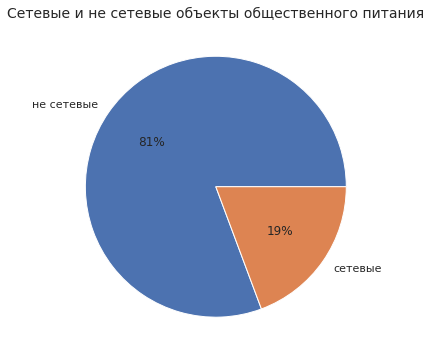

<Figure size 432x288 with 0 Axes>

In [67]:
with plt.style.context('seaborn-white'):
    f, ax = plt.subplots(figsize=(6,6))
    fig = plt.figure()
    #ax = fig.add_axes([2,2,1,1])
    ax.pie(chain_rest['chain_count'], labels = ['не сетевые', 'сетевые'], autopct='%1.0f%%')

ax.set_title('Сетевые и не сетевые объекты общественного питания', fontsize=14)

sns.despine()
plt.show()

#### Вывод:
Подавляющая доля заведений является не сетевыми (81%), доля сетевых заведений равна 19 %

 -  Для какого вида объекта общественного питания характерно сетевое распространение?

In [68]:
# найдём количество типов объектов питания по типу сетевой/ не сетевой
rest_by_chain = rest.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count').reset_index()

#найдём долю
rest_by_chain['proportion'] = (rest_by_chain['да']/rest_by_chain['нет'])*100

#отсортируем по убыванию
rest_by_chain = rest_by_chain.sort_values(by = 'proportion', ascending = False)

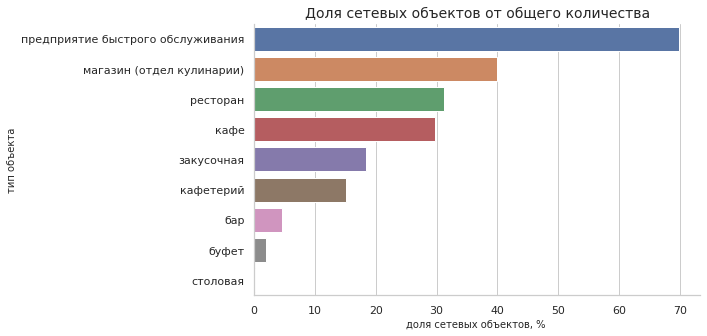

In [69]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(8, 5))

sns.barplot( x ="proportion", y="object_type", data=rest_by_chain)

ax.set_title('Доля сетевых объектов от общего количества', fontsize=14)
ax.set_xlabel('доля сетевых объектов, % ', fontsize=10)
ax.set_ylabel('тип объекта', fontsize=10)
sns.despine()
plt.show()

#### Вывод:
Наибольшее преобладание сетевых объектов приходится на предприятия быстрого обслуживания (почти 70%), далее идут отделы кулинарии в магазинах (40%) и рестораны и кафе (около 30%).

 - Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [70]:
#выбираем сетевые объекты
rest_chain = rest.query('chain == "да"')

In [71]:
#приводим названия к единому типу

#приводим названия к нижнему регистру
rest_chain['object_lowname'] = rest_chain.loc[:,'object_name'].str.lower()

#удаляем сопутствующую информацию из названия
rest_chain['object_name_clear'] = rest_chain.loc[:,'object_lowname'].str.replace("кафе «|»|«|ресторан «|пиццерия «|»»|детский клуб «|детское кафе «|закусочная «|кафе-закусочная «|кафе |предприятие быстрого обслуживания «|предприятие быстрого питания «|ресторан |японский ресторан «|кальян-бар|кофейня |магазин готовой еды |пицерия |точка продажи готовой еды |ресторан быстрого питания «|кафе быстрого питания |пиццерия |'", "")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [72]:
#создаём словарь для переименования крупных сетей
dict_synonym = {'бургер кинг':['бургер кинг burger king'],
"доминос пицца":["доминос пицца domino,s pizza"],
'крошка картошка':['быстрого питания крошка картошка'],
'макдоналдс':['москва - макдоналдс','ресторанмакдоналдс'],
'папа джонс':['пиццерия папа джонс'],
'суши wok':['сеть магазинов суши wok', 'суши вок' ],
'теремок':['пбо теремок', 'теремок инвест', 'теремок-инвест' ],
'шоколадница':['шоколадница кофе хаус', 'шоколадница кофемания'],
'kfc':['быстрого питания kfc', 'закусочная kfc','пбо kfc',  'пбо kfc покрышкина', 'ростикс kfc',  'kfc волгоградский']}

In [73]:
#функция по переименованию
def synonym_replace(row):
    for key, value in dict_synonym.items():
        if row in value:
            return key
        elif row in key:
            return row
    return row    

In [74]:
#получаем единый вид названий объектов
rest_chain['replese_name'] = rest_chain['object_name_clear'].apply(synonym_replace)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
#получаем ТОП-5 популярных сетей
top_5_chain = rest_chain.groupby('replese_name').agg({'id':'count'}).reset_index().sort_values(by = 'id', ascending = False).query('replese_name != "милти"').head(5)

In [76]:
#получаем имена ТОП-5 популярных сетей
top_5_chan_name= list(top_5_chain['replese_name'])
top_5_chan_name

['kfc', 'шоколадница', 'макдоналдс', 'бургер кинг', 'теремок']

In [77]:
#найдём среднее количество мест в сети и количество рестранов сети
rest_chain_number = rest_chain.groupby('replese_name').agg({'id':'count', 'number':'median'}).reset_index()

#переименуем столбцы
rest_chain_number.set_axis(['replese_name','count_chain','median_number'], axis = 'columns', inplace = True)


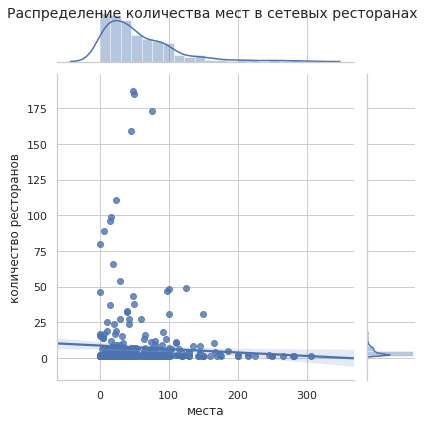

In [78]:
ax = sns.jointplot(x="median_number", y="count_chain", 
                   data=rest_chain_number, 
                   kind='reg',
                   xlim=None,
                   ylim=None).set_axis_labels("места", "количество ресторанов")

plt.suptitle('Распределение количества мест в сетевых ресторанах', fontsize=14)   
plt.grid(True)
plt.tight_layout()
plt.show()

#### Выводы:

Наиболее характерное количество посадочных мест для каждой сети достаточно сильно разниться. Но всё же можно выделить наиболее популярные форматы, это диапазон от 10 до 50 мест.

 -  Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

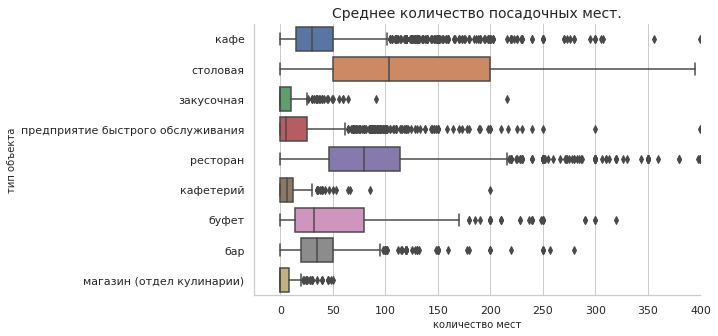

In [79]:
#строим боксплот среднего распределения посадочных мест
sns.set_style('whitegrid')
f, ax =  plt.subplots(figsize=(8, 5))

x = sns.boxplot(y="object_type", x="number", data=rest)

ax.set_title('Среднее количество посадочных мест.', fontsize=14)
ax.set_xlabel('количество мест', fontsize=10)
ax.set_ylabel('тип объекта', fontsize=10)
ax.set_xlim(-25, 400)
sns.despine()

plt.show()

#### Выводы:

 - Крупный формат: столовые (100 мест), рестораны (75 мест);
 - Средний формат: кафе, буфеты и бары, у них в среднем (25 - 30 мест);
 - Мелкие форматы: закусочные, предприятия быстрого обслуживания, кафетерии, отделы кулинарии, в среднем от 0 до 10 мест. 

 -  Выделите в отдельный столбец информацию об улице из столбца address .

#### Выделяем название улиц rest

In [80]:
#извлекаем населённый пункт 

pattern = '\,(([а-яА-Я0-9\-ё\s])?(город|поселение|посёлок)([а-яА-Яё0-9\-\s]+)?)\,'

rest['place'] = rest['address'].str.extract(pat = pattern)[0]

In [81]:
#извлекаем улицу street
pattern = '\,(([а-яА-Я0-9\-ё\s]+)?(улица|переулок|шоссе|площадь|набережная|проезд|тупик|проспект|бульвар|линия|аллея|просек|километр|территория|микрорайон|квартал|проектируемый)([а-яА-Яё№"0-9\-\s]+)?)\,'

rest['street'] = rest['address'].str.extract(pat = pattern)[0]

In [82]:
#меняем пропуски на 0
rest['place'] = rest['place'].fillna(0)
rest['street'] = rest['street'].fillna(0)


In [83]:
#функция объединения населённый пункт и название улицы
def string_func(row):
    if row[6] == 0 and row[7] == 0:
        return row[4].strip().split(',')[0]
    elif row[6] != 0 and row[7] == 0:
        return row[6].strip(" ")
    elif row[6] == 0 and row[7] != 0:
        return row[7].strip(" ")
    else:
        return row[6].strip(" ") + ", "+ row[7].strip(" ")

In [84]:
#применяем функцию для объединения

rest['street_corr'] = rest.apply(string_func, axis = 1)

In [85]:
#убираем пробелы
rest['place'] = rest['place'].str.strip(" ")

In [86]:
# делаем замены в таблице rest
rest['street_corr'] =  rest['street_corr'].apply(lambda x: x.replace("город Зеленоград", "Зеленоград"))
rest['street_corr'] =  rest['street_corr'].apply(lambda x: x.replace("ё", "е"))
rest['street_corr'] =  rest['street_corr'].apply(lambda x: x.replace("№", "N"))
rest['street_corr'] =  rest['street_corr'].apply(lambda x: x.lower())
rest['street_corr'] =  rest['street_corr'].apply(lambda x: x.replace("улица мичуринский проспект", "мичуринский проспект"))
rest['street_corr'] =  rest['street_corr'].apply(lambda x: x.replace("территория ленинские горы", "ленинские горы"))


In [87]:
#находим города в Москве самым большим количеством заведений
top10_place = rest.groupby('place').agg({'id': 'nunique'}).reset_index().sort_values('id', ascending = False).head(7)

#получаем их названия
top10_place_name = list(top10_place.place.unique())

In [88]:
top10_place_name

['город Зеленоград',
 'поселение Сосенское',
 'поселение Московский',
 'город Московский',
 'город Троицк',
 'город Щербинка',
 'поселение Воскресенское']

#### Выделяем название улиц mosgaz_streets

In [89]:
#функция по выделению Зеленограда в отдельный столбец
def corr_msgz(row):
    if row == 'Зеленоград':
        return 'Зеленоград'

mosgaz_streets['place'] = mosgaz_streets['okrug'].apply(corr_msgz)

In [90]:
# делаем замены в таблице mosgaz_streets
mosgaz_streets['streetname'] =  mosgaz_streets['streetname'].apply(lambda x: x.replace("ё", "е"))
mosgaz_streets['streetname'] =  mosgaz_streets['streetname'].apply(lambda x: x.replace("3-й Митинский проезд", "3-й Митинский переулок"))
mosgaz_streets['streetname'] = mosgaz_streets['streetname'].str.strip(" ")
mosgaz_streets['place'] = mosgaz_streets['place'].fillna(0)
mosgaz_streets['streetname'] =  mosgaz_streets['streetname'].apply(lambda x: x.replace("МКАД, ", ""))
mosgaz_streets['streetname'] =  mosgaz_streets['streetname'].apply(lambda x: x.replace("-й километр", "-й километр Московской Кольцевой Автодороги"))


In [91]:
#функция объединения населённый пункт и название улицы
def string_func_msg(row):
    
    if row[4] == 0:
        return row[0].strip(" ")
    else:
        return row[4].strip(" ") + ", "+ row[0].strip(" ")


In [92]:
#применяем функцию для объединения
mosgaz_streets['street_corr'] = mosgaz_streets.apply(string_func_msg, axis = 1)

In [93]:
#приводим к нижнему регистру
mosgaz_streets['street_corr'] = mosgaz_streets['street_corr'].apply(lambda x: x.lower())

 -  Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [94]:
# объединяем таблицы ресторанами и данными по районам
rest_by_raions = rest.merge(mosgaz_streets, left_on='street_corr', right_on='street_corr', how = 'left')

rest_by_raions.head(5)

,id,object_name,chain,object_type,address,number,place_x,street,street_corr,streetname,areaid,okrug,area,place_y
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,NaN,улица Егора Абакумова,улица егора абакумова,улица Егора Абакумова,86.0,СВАО,Ярославский Район,0
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,NaN,улица Талалихина,улица талалихина,улица Талалихина,18.0,ЦАО,Таганский район,0
2,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,NaN,улица Талалихина,улица талалихина,улица Талалихина,117.0,ЮВАО,Нижегородский район,0
3,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,NaN,улица Талалихина,улица талалихина,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово,0
4,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,NaN,Абельмановская улица,абельмановская улица,Абельмановская улица,18.0,ЦАО,Таганский район,0


In [95]:
# добавляем информацию о районах отсутствующую в данных Мосгаза
# проставляем данные по районам Москвы
def area_msk(row):
    if row[8] == 'зеленоград':
        return 'Зеленоград'
    elif  row[6] == 'поселение Сосенское':
        return 'Сосенское'
    elif  row[6] == 'поселение Московский':
        return 'Московский'
    elif  row[6] == 'город Троицк':
        return 'Троицк'
    elif  row[6] == 'город Щербинка':
        return 'Щербинка'
    else:
        return row[12]
    
rest_by_raions['area_corr'] = rest_by_raions.apply(area_msk, axis = 1)

In [96]:
# проставляем данные по округам Москвы
def okrug_msk(row):
    if row[8] == 'зеленоград':
        return 'Зеленоград'
    elif  row[6] == 'поселение Сосенское':
        return 'Новомосковский'
    elif  row[6] == 'поселение Московский':
        return 'Новомосковский'
    elif  row[6] == 'город Троицк':
        return 'Троицкий'
    elif  row[6] == 'город Щербинка':
        return 'Новомосковский'
    else:
        return row[11]
    
rest_by_raions['okrug_corr'] = rest_by_raions.apply(okrug_msk, axis = 1)

In [97]:
#находим ТОП-10 улиц по количеству объектов общественного питания
street_count = rest.groupby('street_corr', as_index=False)['id'].count().sort_values(by = 'id', ascending = False)

street_count.columns = ['street_corr','count']

street_top_10 = street_count.head(10)

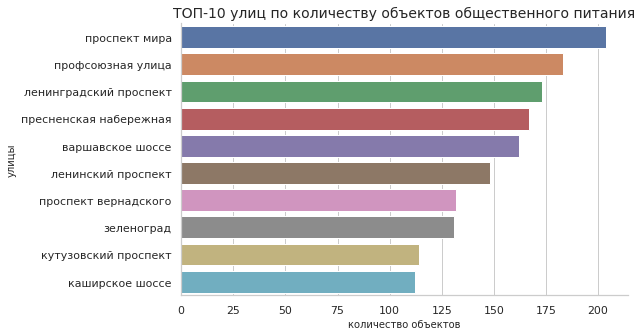

In [98]:
f, ax = plt.subplots(figsize=(8, 5))

sns.barplot( x ="count", y="street_corr", data=street_top_10)

ax.set_title('ТОП-10 улиц по количеству объектов общественного питания', fontsize=14)
ax.set_xlabel('количество объектов', fontsize=10)
ax.set_ylabel('улицы', fontsize=10)
sns.despine()
plt.show()

#### Вывод:
Магистральные улицы идущие через весь город являются лидерами по количеству объектов общественного питания.

In [99]:
# убираем дубликаты от объединения таблиц
rest_raion_unic = rest_by_raions.groupby('id').agg({'street_corr': 'first','okrug_corr': 'first', 'area_corr': 'first'}).reset_index()

In [100]:
# находим ТОП-10 районов по количеству объектов общественного питания
top10_street_by_area = rest_raion_unic.groupby('area_corr').agg({'street_corr': 'count'}).reset_index().sort_values(by = 'street_corr', ascending = False).head(10)

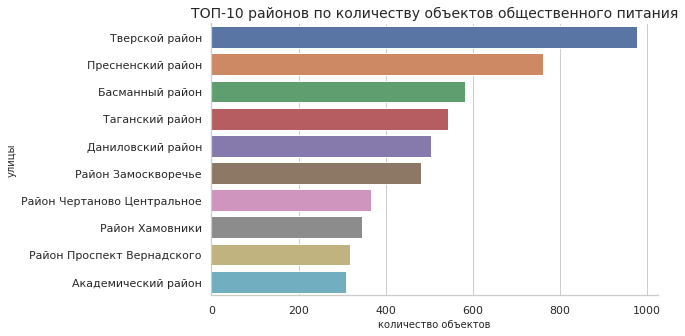

In [101]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(8, 5))

sns.barplot( x ="street_corr", y="area_corr", data=top10_street_by_area)

ax.set_title('ТОП-10 районов по количеству объектов общественного питания', fontsize=14)
ax.set_xlabel('количество объектов', fontsize=10)
ax.set_ylabel('улицы', fontsize=10)
sns.despine()
plt.show()

#### Вывод:
Наибольшее количество объектов общественного питания находится в центральных районах Москвы (Тверской, Пресненский, Басманный), уступают им лишь юго-западные районы (Даниловский, Чертаново Центральное, Проспект Вернадского)


 - Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [102]:
# находим улицы с одним объектом общественного питания
one_rest = rest_raion_unic.groupby('street_corr').agg({'id': 'count', 'area_corr': 'first'}).reset_index()

#переименовываем столбцы
one_rest.columns = ['street_corr','count','area_corr']

# число улиц с одним объектом общественного питания
print('Число улиц с одним объектом общественного питания:',one_rest.query('count == 1').shape[0])

Число улиц с одним объектом общественного питания: 605


In [103]:
#выделяем улицы с одним объектом
one_rest = one_rest.query('count == 1')

In [104]:
#находим районы в Москвы где чаще всего находятся такие улицы
one_rest_by_area = one_rest.groupby('area_corr').agg({'street_corr': 'count'}).reset_index().sort_values(by = 'street_corr', ascending = False).head(10)

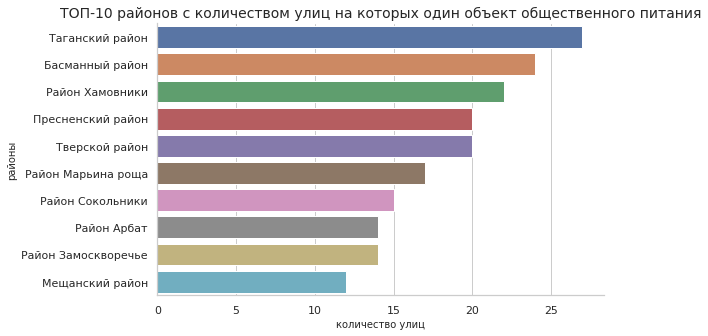

In [105]:
f, ax = plt.subplots(figsize=(8, 5))

sns.barplot( x ="street_corr", y="area_corr", data=one_rest_by_area)

ax.set_title('ТОП-10 районов с количеством улиц на которых один объект общественного питания', fontsize=14)
ax.set_xlabel('количество улиц', fontsize=10)
ax.set_ylabel('районы', fontsize=10)
sns.despine()
plt.show()

#### Вывод:
Районами-лидерами по количеству улиц с одним объектом общественного питания является Таганский, Басманный и Хамовники. В этих районах возможен потенциал для открытия новых заведений.

 -  Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [106]:
#получаем ТОП-5 улиц
street_top_5_name = street_top_10_name[0:5]

#делаем выборку по ТОП-5 улиц
rest_top_5_sreets = rest[rest['street_corr'].isin(street_top_5_name)]

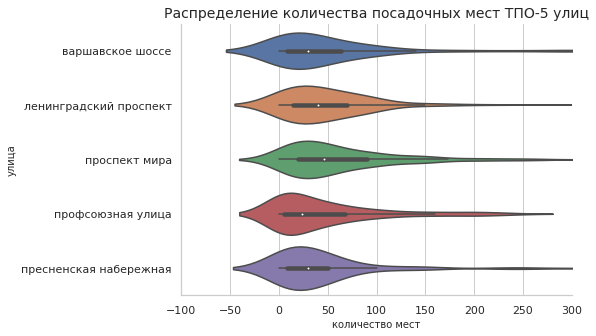

In [107]:
#строим распределение
f, ax =  plt.subplots(figsize=(7, 5))

ax = sns.violinplot(x="number", y="street_corr", 
                   data=rest_top_5_sreets)

ax.set_title('Распределение количества посадочных мест ТПО-5 улиц', fontsize=14)
ax.set_xlabel('количество мест', fontsize=10)
ax.set_ylabel('улица', fontsize=10)
ax.set_xlim(-100, 300)
sns.despine()
plt.show()

#### Вывод:

На улицах с большим количеством объектов общественного питания, преобладают форматы от 10 до 40 посадочных мест.

## Общий Вывод:


- Количество данных - 15366 заведений на всю территорию Москвы;
- проверка на дубликаты по id не выявила их;


- Наиболее распространённый формат общественного питания это кафе более 6 тыс., они занимаю 40% от общего количества; заведений. Также большие доли у столовых (17%), ресторанов (15%) и предприятий быстрого питания(13%);
- Подавляющая доля заведений является не сетевыми (81%), доля сетевых заведений равна 19 %;
- Наибольшее преобладание сетевых объектов приходится на предприятия быстрого обслуживания (почти 70%), далее идут отделы кулинарии в магазинах (40%) и рестораны и кафе (около 30%).

-  Наиболее характерное количество посадочных мест для каждой сети достаточно сильно разниться. Но всё же можно выделить наиболее популярные форматы, это диапазон от 10 до 50 мест.

- Количество посадочных мест по типу: столовые и рестораны (75- 100 мест), кафе, буфеты и бары, у них в среднем (25 - 30 мест), закусочные, предприятия быстрого обслуживания, кафетерии, отделы кулинарии  (0 до 10 мест);

- Магистральные улицы идущие через весь город являются лидерами по количеству объектов общественного питания ('проспект Мира, Профсоюзная улица, Ленинградский проспект и т.д.);

- Наибольшее количество объектов общественного питания находится в центральных районах Москвы (Тверской, Пресненский, Басманный), уступают им лишь юго-западные районы (Даниловский, Чертаново Центральное, Проспект Вернадского)

- Районами-лидерами по количеству улиц с одним объектом общественного питания является Таганский, Басманный и Хамовники. В этих районах возможен потенциал для открытия новых заведений.
 
- На улицах с большим количеством объектов общественного питания, преобладают форматы от 10 до 40 посадочных мест.


#### Рекомендации

 - Формат: кафе;
 - Количество посадочных мест: при развитии сети 20-50 посадочных мест, для стартовых проектов до 30 мест;
 - Район расположения: центр или юго-запад Москвы;
 - Таганский, Басманный и Хамовники - потенциальные районы для открытия новых заведений, это достаточно популярные районы и у них есть улицы с малым количество конкурентов. 
